In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [101]:
class LinearRegression:
    def __init__(self, learning_rate = 0.001, max_iters = 1000):
        self.lr = learning_rate
        self.max_iters = max_iters
        self.weights = None
        self.b = None
    
    def fit(self, X, y):
        #if len(X.shape) == 1:
        #    X = X.values.reshape(-1, 1)
            
        self.n_rows, self.n_features = X.shape
        
        #init model parameters
        self.weights = np.zeros(self.n_features)
        self.b = 0
        
        #iterate for gradient descent
        for i in range(self.max_iters):
            #get the difference between true and predicted values
            error = self.get_error(X, y)
            #compute the gradients
            dw, db = self.get_gradients(X, error)
            #update the parameters
            self.update_params(dw, db)
        
    #compute the errors        
    def get_error(self, X, y):
        #compute predicted values
        y_hat = np.dot(X, self.weights) + self.b
        error = y_hat - y
        return error
    
    def get_gradients(self, X, error):
        #calculate the gradients of weights and bias
        dw = (1/self.n_rows) * np.dot(X.T, error)
        db = (1/self.n_rows) * np.sum(error)
        return dw, db
    
    def update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.b -= self.lr * db
        return
    
    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.b
        return predictions
        

In [103]:
data = pd.read_csv("C:/Users/ASUS/ML algorithms/lin_reg/data.csv")

In [104]:
def rmse(y_pred, y_true):
    res = np.sqrt(np.mean((y_pred - y_true) ** 2))
    return res

In [105]:
X = data.drop('x', axis = 1).values
y = data["y"].values

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#instantiate regressor and fit
model = LinearRegression(learning_rate=1e-4, max_iters=100)
model.fit(X_train, y_train)

#make prediction
predictions = model.predict(X_test)
print(f"RMSE: {rmse(y_test, predictions)}")

RMSE: 0.008145450827921669


In [106]:
model.weights

array([0.999733])

In [107]:
model.b

0.016314714968817774

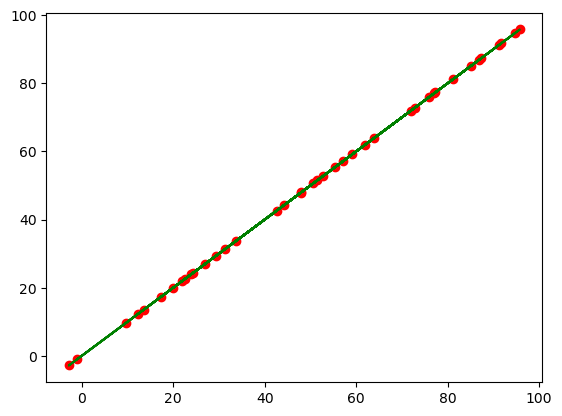

In [108]:
plt.figure()

#plot predictions
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, predictions, color = 'g')
plt.show()